In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, \
                                  LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans

In [5]:
df = pd.read_csv("../data/kc_house_data.csv")
cols = list(df.columns)
print(df.shape, cols, sep="\n")

(21613, 21)
['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [10]:
df.head(7)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


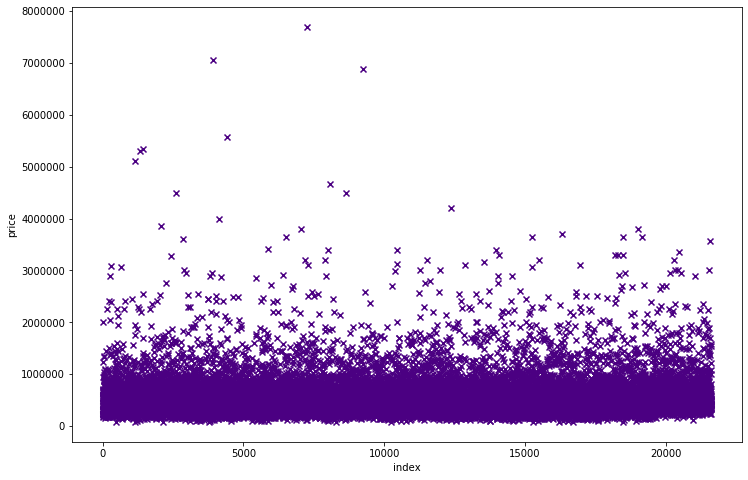

In [29]:
plt.figure(figsize=(12, 8))
plt.scatter(list(df.index), df["price"], c='indigo', marker='x')
plt.xlabel("index")
plt.ylabel("price")
plt.show()    # di akhir plot

In [43]:
arr_idx = np.random.randint(0, df.shape[0], df.shape[0])
np.random.shuffle(arr_idx)
arr_idx

array([ 6813, 16661,  9241, ...,  5406,  1406, 12928])

In [51]:
df_subset = df.loc[arr_idx[:100]]
print(df_subset.shape)
df_subset.head()

(100, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6813,806000020,20150310T000000,203000.0,3,1.50,1200,9120,1.0,0,0,...,7,1000,200,1963,0,98055,47.4545,-122.187,1640,9200
16661,9543000896,20140825T000000,237000.0,3,1.50,1800,9216,1.0,0,0,...,7,1800,0,1950,0,98001,47.2739,-122.249,1400,10022
9241,1973800150,20150402T000000,480000.0,4,2.25,2330,14190,1.0,0,0,...,8,1740,590,1962,0,98034,47.7180,-122.242,2330,14190
14812,3459600330,20150209T000000,925000.0,3,2.75,3640,10300,1.0,0,0,...,9,2060,1580,1979,0,98006,47.5612,-122.146,3110,10625
15399,5603700095,20140610T000000,655275.0,3,1.75,2050,11856,1.0,0,0,...,7,1460,590,1962,0,98006,47.5735,-122.162,2670,11856


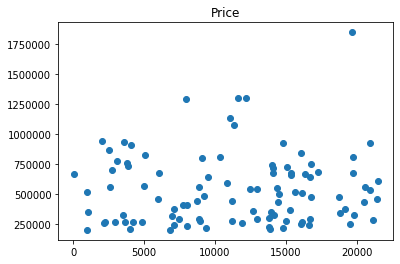

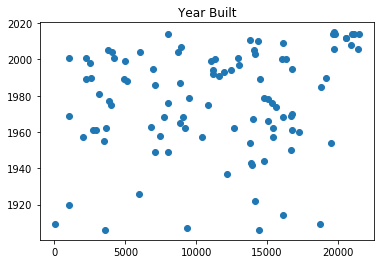

In [59]:
plt.scatter(list(df_subset.index), df_subset["price"])
plt.title("Price")
plt.show()

plt.scatter(list(df_subset.index), df_subset["yr_built"])
plt.title("Year Built")
plt.show()

In [66]:
std_scaler = StandardScaler()
X = std_scaler.fit_transform(df[["yr_built", "sqft_basement"]])
X_built_basement = pd.DataFrame(X, columns=["yr_built", "sqft_basement"])
X_built_basement.describe()

,yr_built,sqft_basement
count,2.161300e+04,2.161300e+04
mean,1.914681e-15,6.838148e-17
std,1.000023e+00,1.000023e+00
min,-2.417383e+00,-6.586810e-01
25%,-6.810785e-01,-6.586810e-01
50%,1.360059e-01,-6.586810e-01
75%,8.849999e-01,6.066704e-01
max,1.497813e+00,1.023238e+01


In [70]:
X_built_basement

,yr_built,sqft_basement
0,-0.544898,-0.658681
1,-0.681079,0.245141
2,-1.293892,-0.658681
3,-0.204446,1.397515
4,0.544548,-0.658681
...,...,...
21608,1.293542,-0.658681
21609,1.463768,-0.658681
21610,1.293542,-0.658681
21611,1.123316,-0.658681


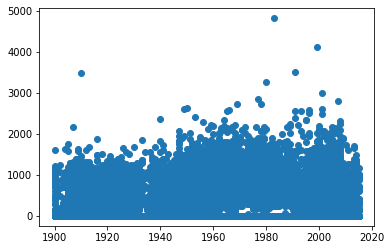

In [72]:
plt.scatter(df["yr_built"], df["sqft_basement"])

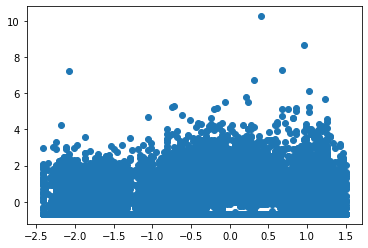

In [71]:
plt.scatter(X_built_basement["yr_built"], X_built_basement["sqft_basement"])

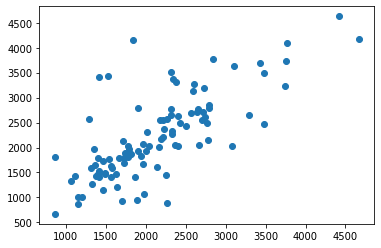

In [85]:
plt.scatter(df_subset["sqft_living15"], df_subset["sqft_living"])

In [92]:
kmeans = KMeans(n_clusters=3, random_state=41)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=41, tol=0.0001, verbose=0)

In [93]:
kmeans.fit(df_subset[["sqft_living", "sqft_living15"]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=41, tol=0.0001, verbose=0)

In [95]:
df_subset["cluster"] = kmeans.labels_
df_subset[["sqft_living", "sqft_living15", "cluster"]]

,sqft_living,sqft_living15,cluster
6813,1200,1640,0
16661,1800,1400,0
9241,2330,2330,2
14812,3640,3110,1
15399,2050,2670,2
...,...,...,...
8750,2180,2190,2
3886,2040,3080,2
19681,4160,1840,2
2044,2720,2640,2


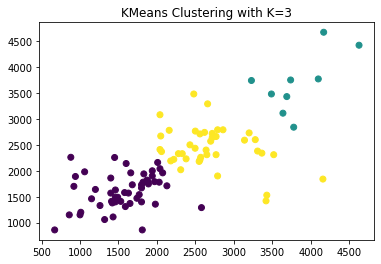

In [101]:
plt.scatter(df_subset["sqft_living"], df_subset["sqft_living15"], c=df_subset["cluster"])
plt.title("KMeans Clustering with K=3")
plt.show()

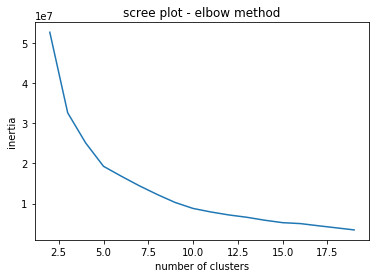

In [113]:
# clusters = [2, 3, 5, 6]
inert = []
for n in range(2, 20):
    kmeans = KMeans(n_clusters=n, random_state=41)
    kmeans.fit(df_subset[["sqft_living", "sqft_living15"]])
    inert.append(kmeans.inertia_)

plt.plot(range(2, 20), inert)
plt.title("scree plot - elbow method")
plt.xlabel("number of clusters")
plt.ylabel("inertia")
plt.show()

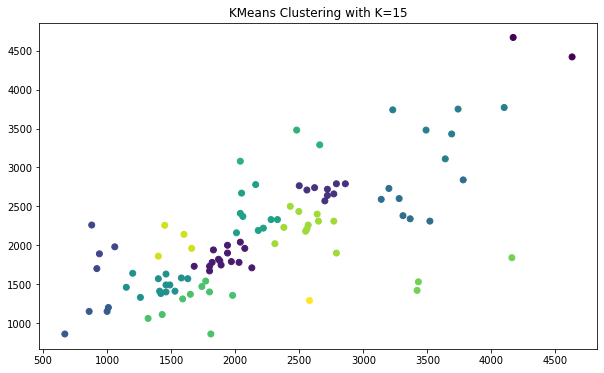

In [116]:
kmean = KMeans(n_clusters=15, random_state=41)
kmean.fit(df_subset[["sqft_living", "sqft_living15"]])

plt.figure(figsize=(10, 6))
plt.scatter(df_subset["sqft_living"], df_subset["sqft_living15"], c=kmean.labels_)
plt.title("KMeans Clustering with K=15")
plt.show()